In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs.zip

--2020-03-02 04:23:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs.zip’

/tmp/cats_and_dogs. 100%[===================>]  65.43M  77.7MB/s    in 0.8s    

2020-03-02 04:23:31 (77.7 MB/s) - ‘/tmp/cats_and_dogs.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

path='/tmp/cats_and_dogs.zip'
zip_ref=zipfile.ZipFile(path,'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [0]:
base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'validation')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

test_cats_dir=os.path.join(test_dir,'cats')
test_dogs_dir=os.path.join(test_dir,'dogs')


In [0]:
train_cats_name=os.listdir(train_cats_dir)
train_dogs_name=os.listdir(train_dogs_dir)
test_cats_name=os.listdir(test_cats_dir)
test_dogs_name=os.listdir(test_dogs_dir)

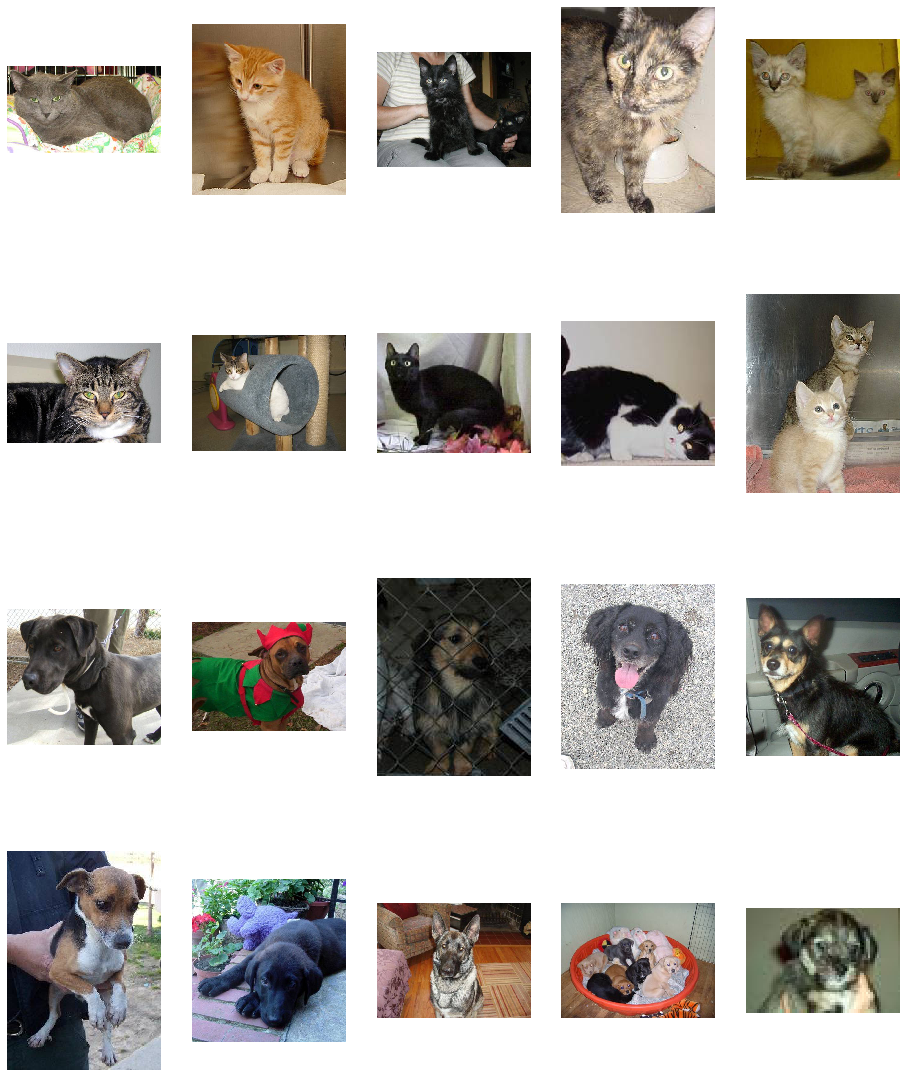

In [5]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows=4
ncols=5

fig=plt.gcf()
fig.set_size_inches(nrows*4,ncols*4)
train_cats=[os.path.join(train_cats_dir,train_cats_name[i])
              for i in range(10)]
train_dogs=[os.path.join(train_dogs_dir,train_dogs_name[j])
              for j in range(10)]
combined=train_cats+train_dogs

for i,toplot in enumerate(combined):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img=mpimg.imread(toplot)
  plt.imshow(img)

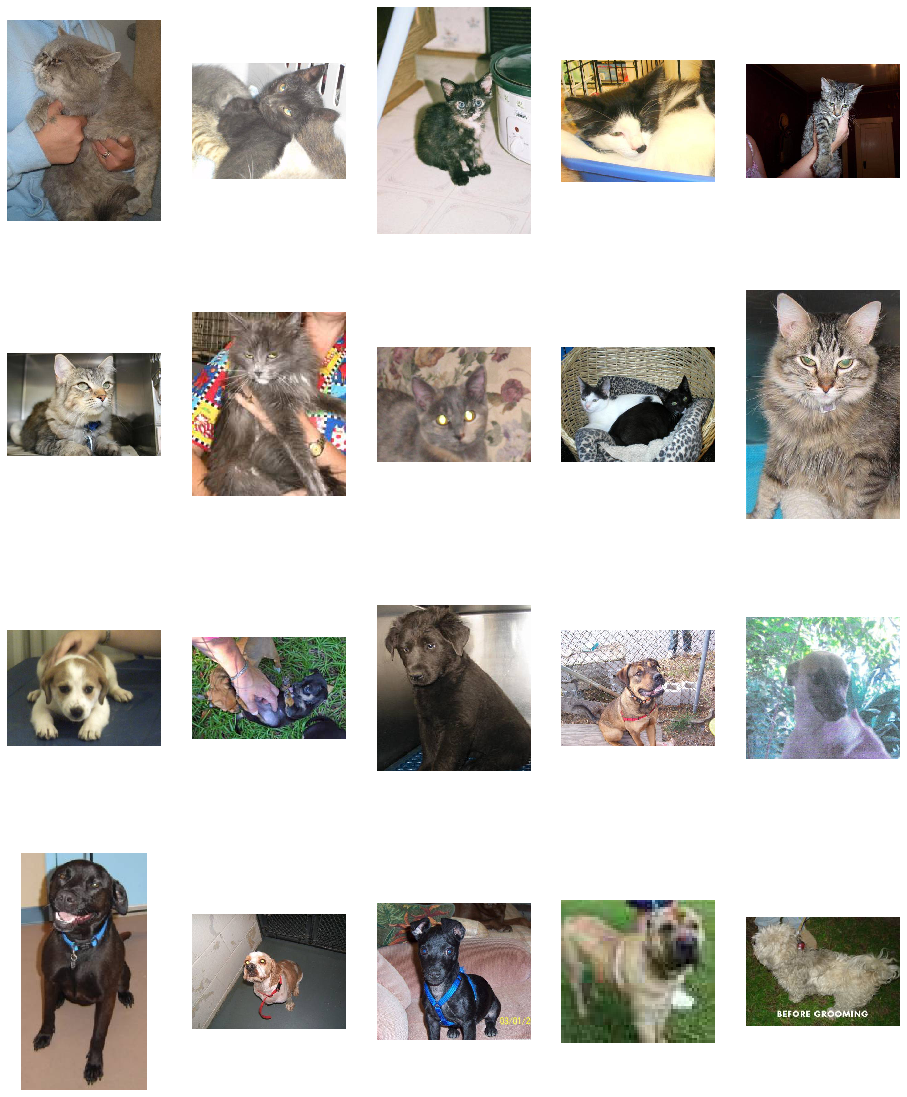

In [6]:
fig=plt.gcf()
fig.set_size_inches(nrows*4,ncols*4)
test_cats=[os.path.join(test_cats_dir,test_cats_name[i])
              for i in range(10)]
test_dogs=[os.path.join(test_dogs_dir,test_dogs_name[j])
              for j in range(10)]
combined=test_cats+test_dogs
for i,toplot in enumerate(combined):
  sp=plt.subplot(nrows,ncols,i+1)
  plt.axis('off')
  img=mpimg.imread(toplot)
  plt.imshow(img)

In [7]:
import tensorflow as tf

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255)
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
Epoch 1/15
100/100 - 14s - loss: 0.8085 - acc: 0.5490 - val_loss: 0.6533 - val_acc: 0.6170
Epoch 2/15
Epoch 1/15
100/100 - 8s - loss: 0.6261 - acc: 0.6580 - val_loss: 0.6042 - val_acc: 0.6520
Epoch 3/15
Epoch 1/15
100/100 - 8s - loss: 0.5470 - acc: 0.7250 - val_loss: 0.6923 - val_acc: 0.6040
Epoch 4/15
Epoch 1/15
100/100 - 8s - loss: 0.4736 - acc: 0.7775 - val_loss: 0.5919 - val_acc: 0.7050
Epoch 5/15
Epoch 1/15
100/100 - 7s - loss: 0.3920 - acc: 0.8195 - val_loss: 0.5837 - val_acc: 0.7330
Epoch 6/15
Epoch 1/15
100/100 - 8s - loss: 0.3088 - acc: 0.8625 - val_loss: 0.7753 - val_acc: 0.7120
Epoch 7/15
Epoch 1/15
100/100 - 8s - loss: 0.2108 - acc: 0.9105 - val_loss: 0.7102 - val_acc: 0.7250
Epoch 8/15
Epoch 1/15
100/100 - 8s - loss: 0.1581 - acc: 0.9400 - val_loss: 0.8534 - val_acc: 0.7000
Epoch 9/15
Epoch 1/15
100/100 - 8s - loss: 0.1042 - acc: 0.9615 - val_loss: 1.0494 - val_acc: 0.7100
Epoch 10/15
Epoch 1/15
100/100 - 8s - loss: 0.0741 - acc: 0.9705 - val_loss: 1.1990 - val_

In [0]:
from google.colab import files
from keras.preprocessing import image
import numpy as np
uploaded=files.upload()

for i in uploaded.keys():
  path='/content/'+i
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  print(x.shape)
  x=np.expand_dims(x,axis=0)
  print(x.shape)
  #x=np.vstack([x])
  print(x.shape)
  classes=model.predict(x,batch_size=10)
  print(classes)
  if(classes[0]>0):
    print(i+" is a dog")
  else:
    print(i+" is a cat")

Saving Stocksy_txp33a24e10lxw100_Medium_214761-5af9d6d7875db900360440a7.jpg to Stocksy_txp33a24e10lxw100_Medium_214761-5af9d6d7875db900360440a7 (1).jpg
(250, 250, 3)
(250, 250, 3, 1)
(250, 250, 3, 1)


ValueError: ignored

This is for visualizing intermediate convolutions


In [0]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import random

intermediate_layers=[layer.output for layer in model.layers[1:]]
visualization=tf.keras.models.Model(inputs=model.input,outputs=intermediate_layers)

cat_images=[os.path.join(train_cats_dir,i) for i in train_cats_name]
dog_images=[os.path.join(train_dogs_dir,j) for j in train_dogs_name]

img_path=random.choice(cat_images+dog_images)
img=load_img(img_path,target_size=(150,150))
x=img_to_array(img)

x=x.reshape((1,)+x.shape)
x/=255.0

successive_maps=visualization.predict(x)

#names of layers
layer_names=[layer.name for layer in model.layers]


This function is for visualizing loss and accuracy

Text(0.5, 1.0, 'Training & Validation Loss')

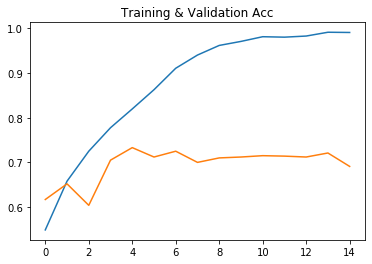

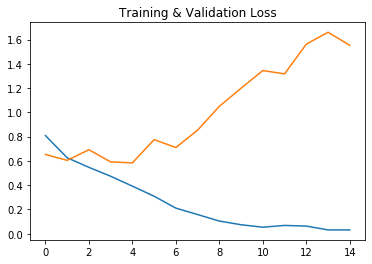

In [15]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title("Training & Validation Acc")
plt.figure()
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("Training & Validation Loss")

This block is to clean up all stored files


In [0]:
import os,signal
os.kill(os.getpid(),signal.SIGKILL)